读取一幅灰度图像，在频域用不同带宽的滤波器，进行低通、高通、高频提升滤波器进行滤波。

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 导入灰度图像
def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img

# 显示原图与滤波后图像
def show_images(original, filtered, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(np.abs(filtered), cmap='gray')
    plt.title(f'{title} Filtered Image')
    plt.axis('off')

    plt.show()


In [8]:
# 图像的傅里叶变换并转换到中心
def fft_image(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)  # 将低频移动到中心
    return fshift

# 傅里叶变换的逆变换
def ifft_image(fshift):
    f_ishift = np.fft.ifftshift(fshift)  # 逆平移
    img_back = np.fft.ifft2(f_ishift)    # 逆变换
    return img_back

# 构建理想低通滤波器
def ideal_lowpass(size, cutoff):
    rows, cols = size
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), cutoff, 1, thickness=-1)
    return mask

# 构建理想高通滤波器
def ideal_highpass(size, cutoff):
    lp = ideal_lowpass(size, cutoff)
    return 1 - lp


In [9]:
# 高频提升滤波器
def high_frequency_emphasis(size, cutoff, boost_factor=1.5, highpass_factor=0.5):
    hp = ideal_highpass(size, cutoff)
    return boost_factor + highpass_factor * hp


In [10]:
def apply_filter(image, filter_mask):
    fshift = fft_image(image)
    filtered_fshift = fshift * filter_mask  # 在频域乘以滤波器
    filtered_img = ifft_image(filtered_fshift)  # 转回空间域
    return filtered_img

In [11]:
root_path = '/root/DIVP_project/'
einstein_path = "project02/proj02-images/einstein_orig.tif"
baboon_path = "project02/proj02-images/baboon.jpg"
headCT_path = "project02/proj02-images/headCT_Vandy.tif"
app17_path = "project02/proj02-images/applo17_boulder_noisy.tif"

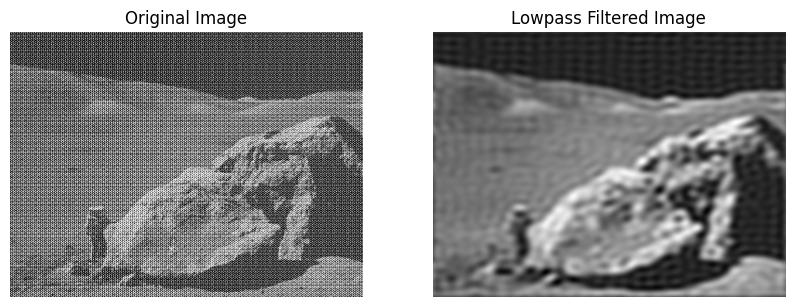

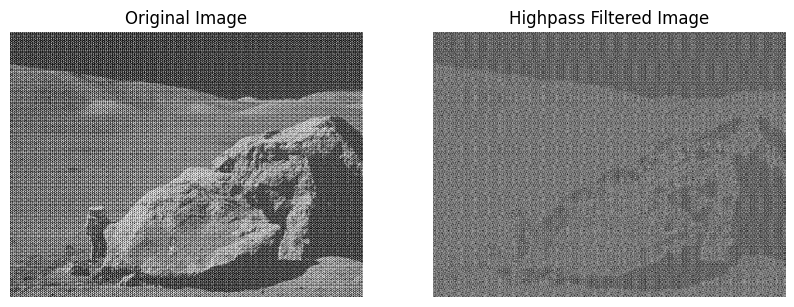

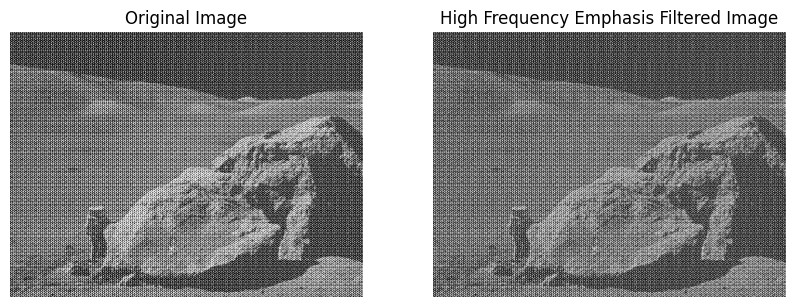

In [12]:
# 读取灰度图像
image_path = root_path + app17_path
img = load_image(image_path)

# 图像的尺寸
size = img.shape

# 应用低通滤波器
lowpass_filter = ideal_lowpass(size, cutoff=30)
lowpass_img = apply_filter(img, lowpass_filter)
show_images(img, lowpass_img, 'Lowpass')

# 应用高通滤波器
highpass_filter = ideal_highpass(size, cutoff=30)
highpass_img = apply_filter(img, highpass_filter)
show_images(img, highpass_img, 'Highpass')

# 应用高频提升滤波器
high_freq_emph_filter = high_frequency_emphasis(size, cutoff=30)
high_freq_emph_img = apply_filter(img, high_freq_emph_filter)
show_images(img, high_freq_emph_img, 'High Frequency Emphasis')